<a href="https://colab.research.google.com/github/valdolab/GenerativeText/blob/main/TextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of Text Generation
Toy example of how to Predicting the next work using LSTM.
This example I'll do it using english words.

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
#step 1, creating the toy corpus
data = "Once upon a time, in a village called La Mancha, in Spain, there lived a man who loved to read about knights. Every day he would read about courageous knights and the incredible adventures they had. He was so absorbed in these stories that he hardly remembered to eat or sleep. \n The days of Knights and Squires, of exciting adventures and romances come alive in the hilarious account of Don Quixote's travels. As years passed, Don Quixote imagines himself placed in the world of knights. He convinces Sancho Panza, a peasant from the same village, to be his squire. And together they set out to seek their fortune, Don Quixote eager to be the best chivalrous knight. This delightful story of chivalry is all fun and pleasure, laughter and excitement, farce and suspense."


In [12]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
print(corpus)

['once upon a time, in a village called la mancha, in spain, there lived a man who loved to read about knights. every day he would read about courageous knights and the incredible adventures they had. he was so absorbed in these stories that he hardly remembered to eat or sleep. ', " the days of knights and squires, of exciting adventures and romances come alive in the hilarious account of don quixote's travels. as years passed, don quixote imagines himself placed in the world of knights. he convinces sancho panza, a peasant from the same village, to be his squire. and together they set out to seek their fortune, don quixote eager to be the best chivalrous knight. this delightful story of chivalry is all fun and pleasure, laughter and excitement, farce and suspense."]


In [14]:
#step 2, train the tokenizer and create word encoding dictionary
tokenizer.fit_on_texts(corpus)

vocab_size = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(vocab_size)

{'and': 1, 'the': 2, 'in': 3, 'to': 4, 'of': 5, 'a': 6, 'knights': 7, 'he': 8, 'don': 9, 'village': 10, 'read': 11, 'about': 12, 'adventures': 13, 'they': 14, 'quixote': 15, 'be': 16, 'once': 17, 'upon': 18, 'time': 19, 'called': 20, 'la': 21, 'mancha': 22, 'spain': 23, 'there': 24, 'lived': 25, 'man': 26, 'who': 27, 'loved': 28, 'every': 29, 'day': 30, 'would': 31, 'courageous': 32, 'incredible': 33, 'had': 34, 'was': 35, 'so': 36, 'absorbed': 37, 'these': 38, 'stories': 39, 'that': 40, 'hardly': 41, 'remembered': 42, 'eat': 43, 'or': 44, 'sleep': 45, 'days': 46, 'squires': 47, 'exciting': 48, 'romances': 49, 'come': 50, 'alive': 51, 'hilarious': 52, 'account': 53, "quixote's": 54, 'travels': 55, 'as': 56, 'years': 57, 'passed': 58, 'imagines': 59, 'himself': 60, 'placed': 61, 'world': 62, 'convinces': 63, 'sancho': 64, 'panza': 65, 'peasant': 66, 'from': 67, 'same': 68, 'his': 69, 'squire': 70, 'together': 71, 'set': 72, 'out': 73, 'seek': 74, 'their': 75, 'fortune': 76, 'eager': 77,

In [15]:
#step 3, create N-gram sequence
input_sequences = []
for line in corpus:
  tokens = tokenizer.texts_to_sequences([line])[0]
  for i in range(1,len(tokens)):
    n_gram_sequence = tokens[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(
    input_sequences,
    maxlen=max_seq_len,
    padding='pre'
))


In [17]:
#step 4, extract features and labels
x = input_seq_array[:,:-1]
labels = input_seq_array[:,-1]

#one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels,num_classes=vocab_size)

In [19]:
print(tokenizer.word_index['village'])
print(x[0])
print(y[0])

10
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 17]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [20]:
#DEFINE THE LSTM MODEL
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_len-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(vocab_size, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x,y, epochs=500, verbose=True)


Epoch 1/500
5/5 [==============================] - 5s 59ms/step - loss: 4.5312 - accuracy: 0.0382
Epoch 2/500
5/5 [==============================] - 0s 55ms/step - loss: 4.5197 - accuracy: 0.0763
Epoch 3/500
5/5 [==============================] - 0s 61ms/step - loss: 4.5102 - accuracy: 0.0763
Epoch 4/500
5/5 [==============================] - 0s 63ms/step - loss: 4.4997 - accuracy: 0.0840
Epoch 5/500
5/5 [==============================] - 0s 63ms/step - loss: 4.4847 - accuracy: 0.0840
Epoch 6/500
5/5 [==============================] - 0s 108ms/step - loss: 4.4608 - accuracy: 0.0763
Epoch 7/500
5/5 [==============================] - 1s 108ms/step - loss: 4.4255 - accuracy: 0.0687
Epoch 8/500
5/5 [==============================] - 1s 111ms/step - loss: 4.3729 - accuracy: 0.0534
Epoch 9/500
5/5 [==============================] - 1s 109ms/step - loss: 4.3322 - accuracy: 0.0382
Epoch 10/500
5/5 [==============================] - 1s 107ms/step - loss: 4.3096 - accuracy: 0.0458
Epoch 11/500
5

In [21]:
#Visualize metrics
import matplotlib.pyplot as plt
def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

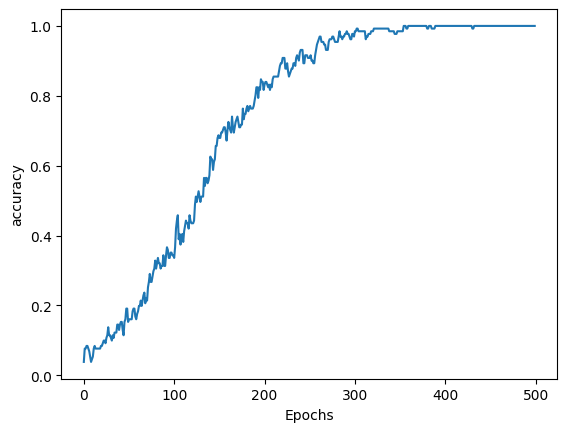

In [22]:
plot_metric(history, "accuracy")

In [36]:
def generate_sentence(seed_text="One day ", next_word = 30):
  for _ in range(next_word):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding="pre")

    #predict
    predicted = np.argmax(model.predict(token_list, verbose=False), axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
  return seed_text


In [46]:
#GENERATE NEW TEXT
seed_text = "this delightful story of "
#how many words wants to predict
next_word = 30
generated_sentence = generate_sentence(seed_text, next_word)
print(generated_sentence)

this delightful story of  knights and squires of exciting adventures and romances come alive in the hilarious account of don quixote's travels as years passed don quixote imagines himself placed in the world of


# Text Generation challenge
This notebook is a challenge on how to create text using LSTMs.
I´ll be using shakerpeare poetry as the training data and then use the trained network to predict the next words and generate meaningful sentences.

## Import libs

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdata
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.0


## Step 1: Create a corpus

In [ ]:
#download data from this url
